# ECON441B-Intro to ML Lab

## Weiqi Xia

# 1.) Pull in Data and Convert ot Monthly

In [19]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [21]:
df.head()

,Adj Close
Date,
1980-12-31,0.117887
1981-01-31,0.097591
1981-02-28,0.091546
1981-03-31,0.084637
1981-04-30,0.098023


In [22]:
# Difference in stock price
df["Diff"] = df["Adj Close"].diff().shift(-1)

# Target
df["Target"] = np.sign(df["Diff"])

df["Premium"] = .08 * df["Adj Close"]

# 3.) Pull in X data, normalize and build a LogReg on column 2

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [24]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [25]:
y = df.loc[:"2023-09-30","Target"].copy()

df = df.loc[:"2023-09-30",:].copy()

In [26]:
# fit a log reg
logreg = LogisticRegression()

logreg.fit(X,y)

LogisticRegression()

# 4.) Add columns, prediction and profits.

In [27]:
y_pred = logreg.predict(X)

In [28]:
df["Predictions"]=y_pred

In [29]:
df["Profits"]= 0.

In [33]:
# True Positive
df.loc[(df["Target"]==1)& (df["Predictions"]==1),"Profits"] = df["Premium"]

# False Positive
df.loc[(df["Target"]==-1)& (df["Predictions"]==1),"Profits"] = (100*df["Diff"])+df["Premium"]



# 5.) Plot profits over time

[]

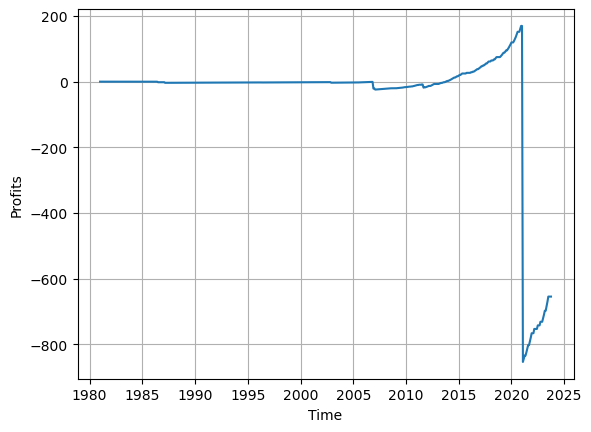

In [35]:
plt.plot(np.cumsum(df["Profits"]))
plt.grid()
plt.xlabel("Time")
plt.ylabel("Profits")
plt.plot()

# 5.5.) Short write up about how you see your skills valuable to PJ and/or Philip Liu

Philip Liu introduces a Coprate business model which could be supported by the DGX Cloud. And he states how to position and pitch DGX Cloud. As it's a full-stack development platform for generative AI, I regard Logistic Regression as one of the most important and core algorithms in machine learning.